[View in Colaboratory](https://colab.research.google.com/github/paxx13/gym/blob/master/gym.ipynb)

# setup environment

In [2]:
%%capture
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg- dev xvfb xephyr libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libjpeg
E: Unable to locate package dev
E: Unable to locate package xephyr


In [3]:
%%capture
!apt-get install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libfontenc1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libllvm5.0 libpciaccess0 libpixman-1-0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxfont1 libxfont2 libxkbfile1 libxmu6
  libxmuu1 libxpm4 libxshmfence1 libxt6 libxxf86vm1 x11-xkb-utils xauth
  xfonts-base xfonts-encodings xfonts-utils xkb-data xserver-common
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libfontenc1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libllvm5.0 libpciaccess0 libpixman-1-0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxaw7 l

In [4]:
%%capture
!apt install freeglut3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libdrm-dev libgl1-mesa-dev libglu1-mesa libglu1-mesa-dev
  libice-dev libsm-dev libx11-xcb-dev libxcb-dri2-0-dev libxcb-dri3-dev
  libxcb-glx0-dev libxcb-present-dev libxcb-randr0 libxcb-randr0-dev
  libxcb-render0 libxcb-render0-dev libxcb-shape0 libxcb-shape0-dev
  libxcb-sync-dev libxcb-xfixes0 libxcb-xfixes0-dev libxdamage-dev libxext-dev
  libxfixes-dev libxi6 libxshmfence-dev libxt-dev libxxf86vm-dev
  mesa-common-dev x11proto-damage-dev x11proto-dri2-dev x11proto-fixes-dev
  x11proto-gl-dev x11proto-xext-dev x11proto-xf86vidmode-dev
Suggested packages:
  libice-doc libsm-doc libxext-doc libxt-doc
The following NEW packages will be installed:
  freeglut3 freeglut3-dev libdrm-dev libgl1-mesa-dev libglu1-mesa
  libglu1-mesa-dev libice-dev libsm-dev libx11-xcb-dev libxcb-dri2-0-dev
  libxcb-dri3-dev libxcb-glx0-dev libxcb-pr

In [0]:
%%capture
!pip install pyvirtualdisplay
!pip install piglet
!pip install pyopengl
!pip install gym

In [0]:
from pyvirtualdisplay import Display

display=Display(visible=0, size=(320, 240)).start()

import os
'''
if type(os.environ.get("Display")) is not str or len(os.environ.get("Display")) == 0:
  !bash ../xvfb start
  %env DISPLAY=:1
'''
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML

# model

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space:  Box(4,)
Action space:  Discrete(2)


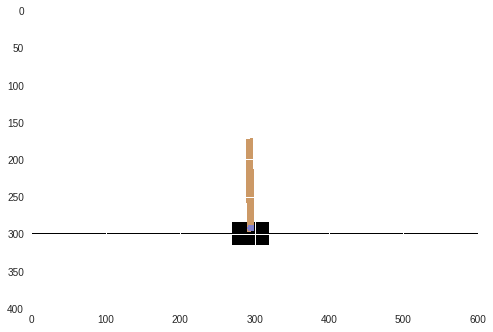

In [17]:
import gym
env = gym.make('CartPole-v0')
env.reset()

plt.imshow(env.render(mode='rgb_array'))
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)

In [33]:
frames = []

for i_episode in range(3):
    observation = env.reset()
    for t in range(100):
        frames.append(env.render(mode="rgb_array"))
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

Episode finished after 23 timesteps
Episode finished after 12 timesteps
Episode finished after 27 timesteps


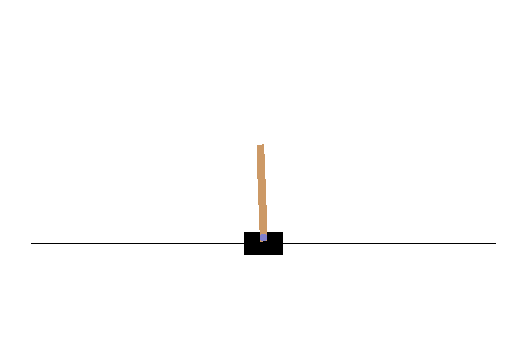

In [34]:
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[1] / 72.0), dpi=72)
patch = plt.imshow(frames[0])
plt.axis("off")
animate = lambda i:patch.set_data(frames[i])
ani = anim.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())